In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Display the graph of any college in any year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


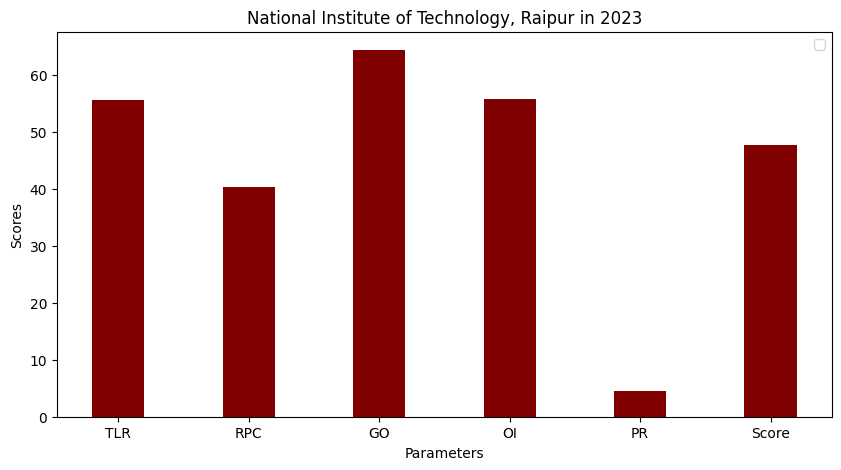

In [19]:
college = "National Institute of Technology, Raipur"
year = 2023
df = pd.read_csv(f'./nirf/{year}.csv')
dict_data = df[df['Name'] == college].to_dict(orient='records')[0]

x_axis = ['TLR', 'RPC', 'GO', 'OI', 'PR', 'Score']
y_axis = []
for i in x_axis:
  y_axis.append(dict_data[i])

fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color ='maroon', width = 0.4)
plt.xlabel("Parameters")
plt.ylabel("Scores")
plt.title(f"{college} in {year}")
plt.show()

### Sample plotting of bar graphs

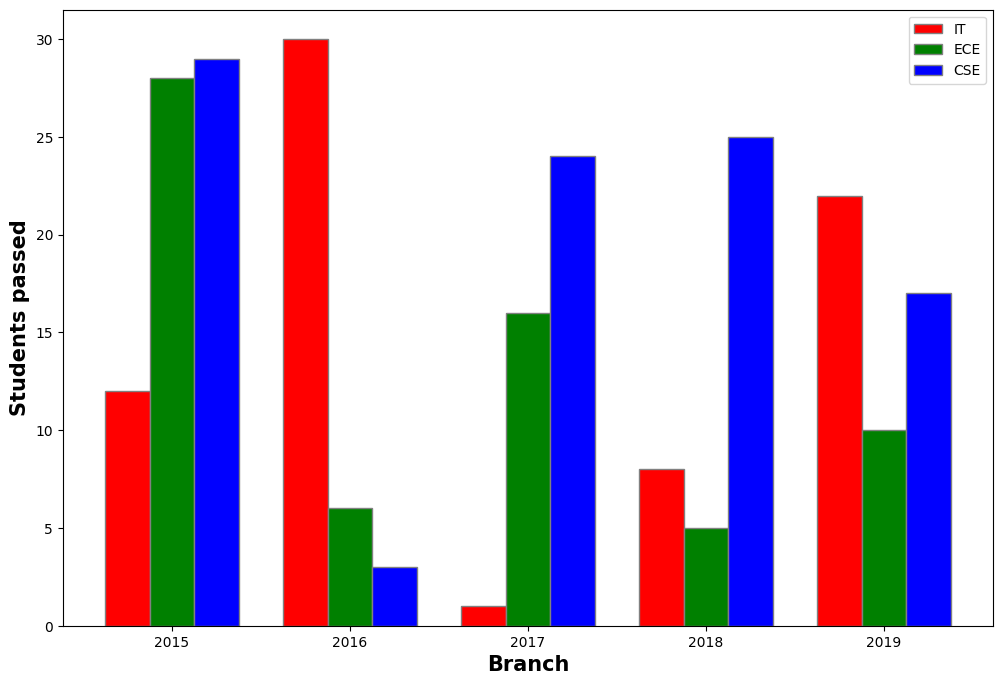

In [37]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar 
IT = [12, 30, 1, 8, 22] 
ECE = [28, 6, 16, 5, 10] 
CSE = [29, 3, 24, 25, 17] 

# Set position of bar on X axis 
br1 = np.arange(len(IT)) 
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth, 
        edgecolor ='grey', label ='IT') 
plt.bar(br2, ECE, color ='g', width = barWidth, 
        edgecolor ='grey', label ='ECE') 
plt.bar(br3, CSE, color ='b', width = barWidth, 
        edgecolor ='grey', label ='CSE')

# Adding Xticks 
plt.xlabel('Branch', fontweight ='bold', fontsize = 15) 
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(IT))], 
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()

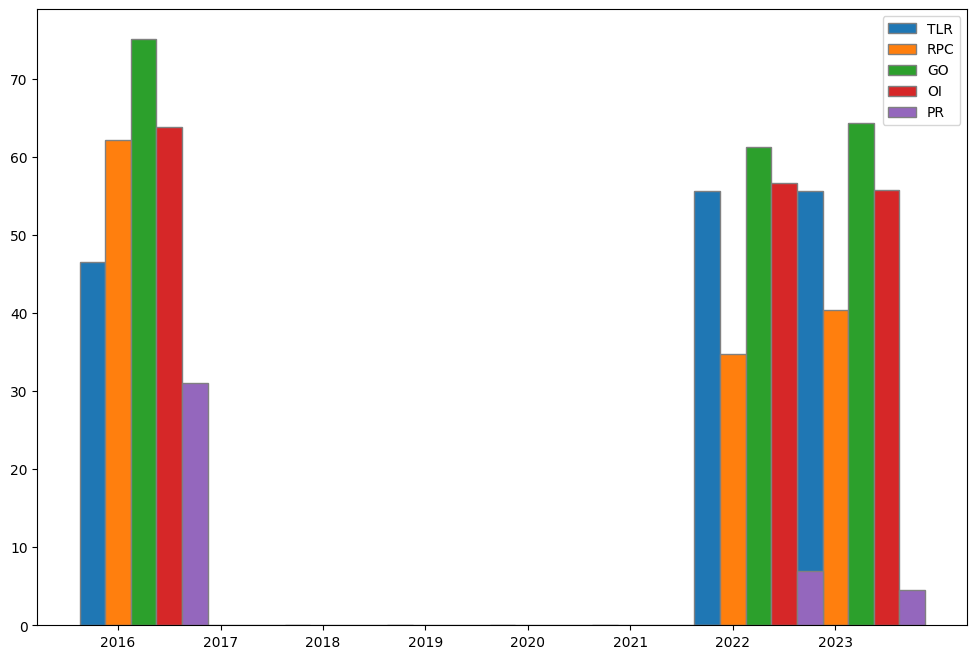

In [99]:
college = "National Institute of Technology, Raipur"
data = {
"TLR": [],
"RPC": [],
"GO": [],
"OI": [],
"PR": [],
}

for year in range(2016, 2024):
  df = pd.read_csv(f'./nirf/{year}.csv')
  df['Name'] = df['Name'].str.upper()
  tmp = df[df['Name'] == college.upper()].to_dict(orient='records')
  flag = 0
  if len(tmp) == 0:
    flag = 1
  
  if not flag:
    tmp = tmp[0]
  for type in data.keys():
    if not flag:
      data[type].append(tmp[type])
    else:
      data[type].append(0)


barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br = np.arange(len(data[type]))
flag = 0

for type in data.keys():
  if not flag:
    plt.bar(br, data[type], width=barWidth, edgecolor ='grey', label=type)
    flag = 1
  else:
    br = [x + barWidth for x in br]
    plt.bar(br, data[type], width=barWidth, edgecolor ='grey', label=type)

plt.legend()
plt.xticks([r + barWidth for r in range(len(data['TLR']))], ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
plt.show()

### Plot the changes in rank over the years

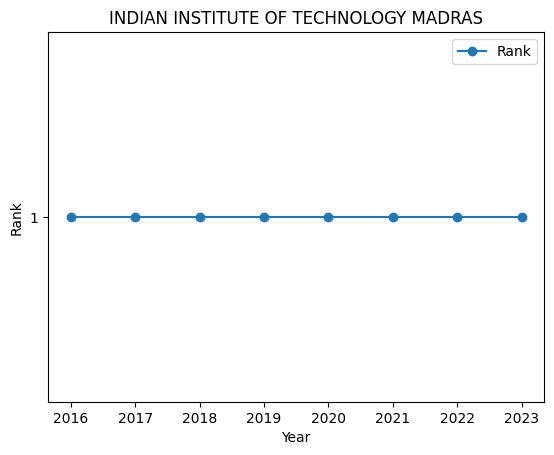

In [3]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
college = "Indian Institute of Technology, Madras"
type_required = ['Rank']
data = {type: [] for type in type_required}

for y in years:
  df = pd.read_csv(f'./nirf/{y}.csv')
  df['Name'] = df['Name'].str.upper()
  df['Name'] = df['Name'].str.replace(",", "")
  college = college.upper()
  college = college.replace(",", "")
  df = df[df['Name'] == college].to_dict(orient='records')
  flag = 0
  if len(df) == 0:
    flag = 1
  
  if not flag:
    df = df[0]

  for type in type_required:
    if not flag:
      data[type].append(df[type])
    else:
      data[type].append(0)

for type in data.keys():
    non_zero_years = [year for year, rank in zip(years, data[type]) if rank != 0]
    non_zero_ranks = [rank for rank in data[type] if rank != 0]
    plt.plot(non_zero_years, non_zero_ranks, marker='o', label=type)

plt.gca().invert_yaxis()
plt.title(college)
plt.ylabel("Rank")
plt.xlabel("Year")
plt.legend()
plt.show()

### Plot the required features of any college for all the years

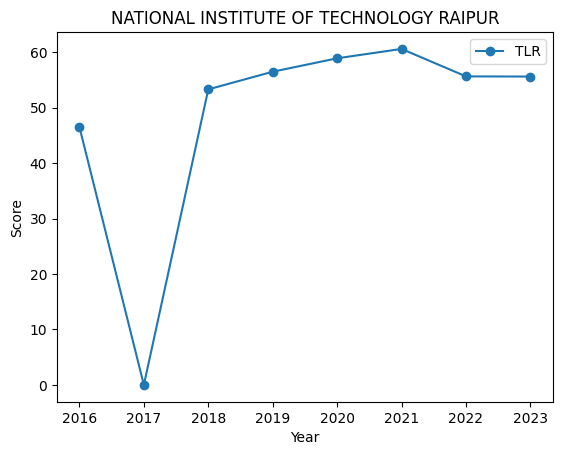

In [72]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
college = "National Institute Of Technology, Raipur"
type_required = ['TLR']
data = {type: [] for type in type_required}

for y in years:
  df = pd.read_csv(f'./nirf/{y}.csv')
  df['Name'] = df['Name'].str.upper()
  df['Name'] = df['Name'].str.replace(",", "")
  college = college.upper()
  college = college.replace(",", "")
  df = df[df['Name'] == college].to_dict(orient='records')
  flag = 0
  if len(df) == 0:
    flag = 1
  
  if not flag:
    df = df[0]

  for type in type_required:
    if not flag:
      data[type].append(df[type])
    else:
      data[type].append(0)

for type in data.keys():
  plt.plot(years, data[type], label=type, marker='o')

plt.title(college)
plt.ylabel("Score")
plt.xlabel("Year")
plt.legend()
plt.show()

### Compare two colleges on any selected topic over the years

{'TLR': [46.48, 0, 53.28, 56.46, 58.88, 60.57, 55.62, 55.59], 'RPC': [62.13, 0, 16.68, 20.11, 24.26, 28.98, 34.76, 40.36], 'GO': [75.15, 0, 55.99, 54.48, 56.99, 59.26, 61.22, 64.35], 'OI': [63.84, 0, 50.27, 49.4, 50.7, 58.32, 56.62, 55.81], 'PR': [31, 0, 1.58, 2.81, 1.63, 2.87, 7.0, 4.51]}


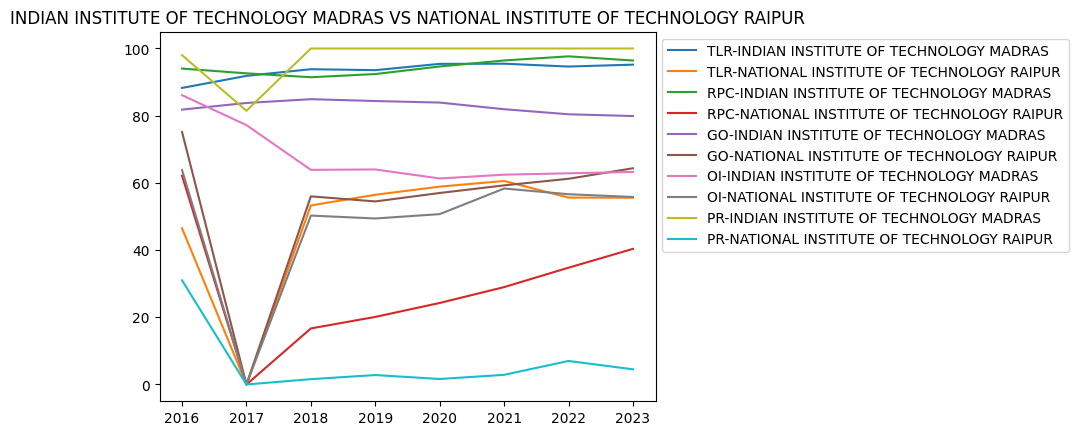

In [48]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
college = "Indian Institute Of Technology, Madras"
comp_college = "National Institute Of Technology, Raipur"
type_required = ['TLR', 'RPC', 'GO', 'OI', 'PR']

data1 = {type: [] for type in type_required}
data2 = {type: [] for type in type_required}

for y in years:
  df = pd.read_csv(f'./nirf/{y}.csv')
  df['Name'] = df['Name'].str.upper()
  df['Name'] = df['Name'].str.replace(",", "")
  college = college.upper()
  college = college.replace(",", "")
  
  comp_college = comp_college.upper()
  comp_college = comp_college.replace(",", "")

  df_dict1 = df[df['Name'] == college].to_dict(orient='records')
  df_dict2 = df[df['Name'] == comp_college].to_dict(orient='records')

  flag1 = 0
  flag2 = 0
  if len(df_dict1) == 0:
    flag1 = 1
  
  if not flag1:
    df_dict1 = df_dict1[0]

  if len(df_dict2) == 0:
    flag2 = 1
  
  if not flag2:
    df_dict2 = df_dict2[0]

  for type in type_required:
    if not flag1:
      data1[type].append(df_dict1[type])
    else:
      data1[type].append(0)

  for type in type_required:
    if not flag2:
      data2[type].append(df_dict2[type])
    else:
      data2[type].append(0)

for type in type_required:
  plt.plot(years, data1[type], label=f"{type}-{college}")
  plt.plot(years, data2[type], label=f"{type}-{comp_college}")

print(data2)

plt.title(f"{college} VS {comp_college}")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Recommendation for any college on the basis of given data over the years

In [47]:
# Define the data dictionary
data = {
    'TLR': [88.26, 91.85, 93.83, 93.55, 95.42, 95.47, 94.62, 95.19],
    'RPC': [94.02, 92.6, 91.44, 92.39, 94.64, 96.43, 97.66, 96.41],
    'GO': [81.81, 83.78, 84.91, 84.36, 83.9, 81.92, 80.42, 79.89],
    'OI': [86.11, 77.19, 63.88, 63.99, 61.31, 62.44, 62.85, 63.26],
    'PR': [98, 81.46, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
}

# Function to calculate the mean and standard deviation for each property
def analyze_performance(data):
    analysis = {}
    for key, values in data.items():
        mean_value = sum(values) / len(values)
        std_deviation = (sum((x - mean_value) ** 2 for x in values) / len(values)) ** 0.5
        analysis[key] = {'Mean': mean_value, 'Standard Deviation': std_deviation}
    return analysis

# Function to provide recommendations based on the analysis
def make_recommendations(analysis):
    recommendations = {}
    for key, values in analysis.items():
        mean = values['Mean']
        std_deviation = values['Standard Deviation']
        if std_deviation > 10:
            recommendations[key] = f"High variation in {key} suggests the need for more consistency."
        elif mean < 90:
            recommendations[key] = f"Low mean value for {key}. Consider improvements in this area."
        else:
            recommendations[key] = f"{key} is performing well."
    return recommendations

# Analyze the performance data
analysis_result = analyze_performance(data)

# Make recommendations based on the analysis
recommendations_result = make_recommendations(analysis_result)

# Print the analysis and recommendations
print("Performance Analysis:")
for key, values in analysis_result.items():
    print(f"{key}: Mean = {values['Mean']:.2f}, Standard Deviation = {values['Standard Deviation']:.2f}")

print("\nRecommendations:")
for key, recommendation in recommendations_result.items():
    print(f"{key}: {recommendation}")


Performance Analysis:
TLR: Mean = 93.52, Standard Deviation = 2.29
RPC: Mean = 94.45, Standard Deviation = 2.09
GO: Mean = 82.62, Standard Deviation = 1.76
OI: Mean = 67.63, Standard Deviation = 8.43
PR: Mean = 97.43, Standard Deviation = 6.07

Recommendations:
TLR: TLR is performing well.
RPC: RPC is performing well.
GO: Low mean value for GO. Consider improvements in this area.
OI: Low mean value for OI. Consider improvements in this area.
PR: PR is performing well.
